**# Data Scientist Associate Practical Exam Solution**


In [153]:
#Load data
import pandas as pd 
data=pd.read_csv('university_enrollment_2306.csv')
data.head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,NaN,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science


In [154]:

#Description of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   int64  
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   object 
 5   post_score        1665 non-null   float64
 6   pre_requirement   959 non-null    object 
 7   department        1850 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 115.8+ KB


In [155]:
#Changed data types as described in the table. 
data['pre_score']=data['pre_score'].apply(lambda x: float(x.split()[0].replace('-', '0')))
data = data.astype({"course_id":'category', "course_type":'category',
                    "pre_requirement":'category',"department":'category', "pre_score":'float',})
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   course_id         1850 non-null   category
 1   course_type       1850 non-null   category
 2   year              1850 non-null   int64   
 3   enrollment_count  1850 non-null   int64   
 4   pre_score         1850 non-null   float64 
 5   post_score        1665 non-null   float64 
 6   pre_requirement   959 non-null    category
 7   department        1850 non-null   category
dtypes: category(4), float64(2), int64(2)
memory usage: 146.4 KB


In [156]:
#Checking for number of missing values in each column 
data.isna().sum()

course_id             0
course_type           0
year                  0
enrollment_count      0
pre_score             0
post_score          185
pre_requirement     891
department            0
dtype: int64

In [157]:
# Fill NaN values in post_score and pre_requirement with 0 and None respectively.
data.fillna(value={'post_score': 0, 'pre_requirement': 'None'}, inplace=True)
data.isna().sum()

TypeError: Cannot setitem on a Categorical with a new category (None), set the categories first

**Task 1**
The dataset contains 1850 rows and 8 columns with missing values in only two columns before cleaning. I have validated all the columns against the criteria in the dataset table:

* course_id: It does not have the same description, I changed the data type to category, and it  has no missing values.
* couse_type: It does not have the same description, I changed the data type to category,  and it  has no missing values.
* year: It has the same description without missing values.
* enrollment_count: It has the same description without missing values.
* pre_score: It does not have the same description, I changed the data type to float, and it  has no missing values.
* post_score: It has the same description, and it  has 185 missing values which I replaced with 0.
* pre_requirement: It does not have the same description, I changed the data type to category, and it  has 891 missing values which I replaced with “None”.
* department: It does not have the same description, I changed the data type to category, and it  has no missing values.

**Task 2**
The chart below shows the distribution of enrollment counts. It is a bimodal distribution where the first group or peak is centered at 170 stuedents enrolled and the second group or peak is centered at 250 students enrolled.

<Figure size 1000x600 with 0 Axes>

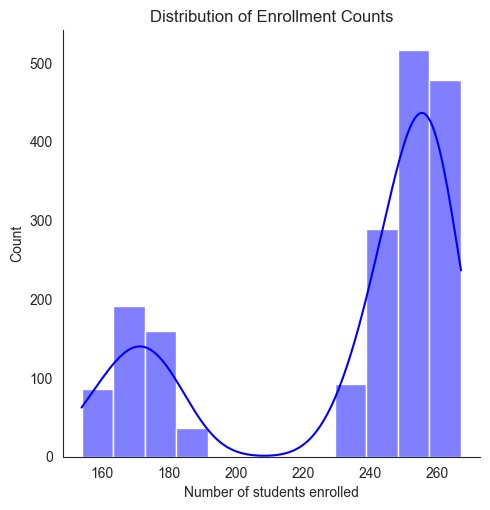

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.set_style('white')
sns.displot(data, x='enrollment_count', kde=True, color='b')
plt.xlabel('Number of students enrolled')
plt.title('Distribution of Enrollment Counts')
plt.show()

**Task 3**
The chart below shows the number of courses of each type. Online courses were approximately triple more than classroom courses.

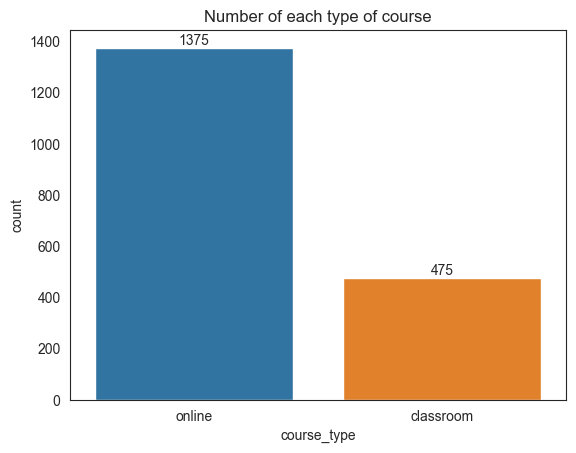

In [ ]:
ax=sns.countplot(x='course_type',
              data=data,
              order=data['course_type'].value_counts().index)
for label in ax.containers:
    ax.bar_label(label)
plt.title('Number of each type of course')
plt.show()

**Task 4**
From below, we can see the relationship between the type of course and the enrollment count. Most of the students enrolled for online courses.

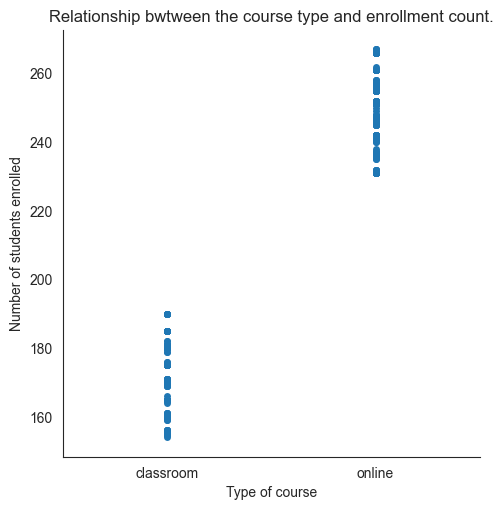

In [ ]:
sns.catplot(x='course_type', y='enrollment_count', data=data,jitter=False )
plt.title('Relationship bwtween the course type and enrollment count.')
plt.xlabel('Type of course')
plt.ylabel('Number of students enrolled')
plt.show()

**Task 5**
Essentially, predicting if the type of course a student will enroll online or classroom is a classification task.

In [ ]:
#Prepocessing of data

data_dummies=pd.get_dummies(data['course_type'],dtype=int)

data_1 = pd.concat((data, data_dummies), axis=1)
 
# Gendercolumn is dropped
data_1 = data_1.drop(["classroom", 'course_type'], axis=1)
 
# Rename the Column
data_1 = data_1.rename(columns={"online": "course_type"})
 
data_1.head()    

,course_id,year,enrollment_count,pre_score,post_score,pre_requirement,department,course_type
0,1,2018,165,28.14,73.0,Beginner,Science,0
1,2,2020,175,79.68,86.0,NaN,Science,0
2,3,2016,257,57.24,80.0,NaN,Mathematics,1
3,4,2013,251,97.67,75.0,Beginner,Technology,1
4,5,2019,165,39.75,76.0,Beginner,Science,0


In [158]:
data1=data_1.drop(['course_id', 'pre_requirement', 'department'], axis=1)

data1.head()


,year,enrollment_count,pre_score,post_score,course_type
0,2018,165,28.14,73.0,0
1,2020,175,79.68,86.0,0
2,2016,257,57.24,80.0,1
3,2013,251,97.67,75.0,1
4,2019,165,39.75,76.0,0


In [159]:
#Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split

X = data1.drop("course_type", axis=1).values
y = data1["course_type"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Task 6 and 7**

The baseline model is Logistic Regression model
the comparison model is Decision Tree Classifier model


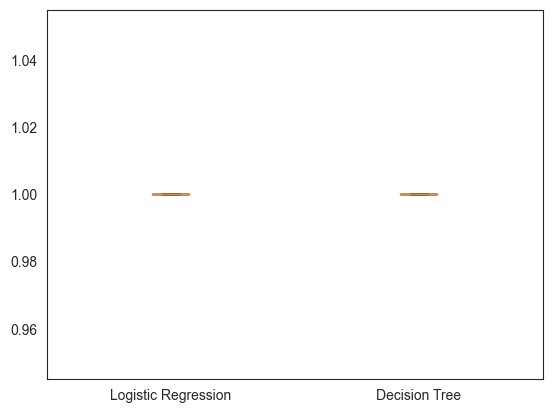

In [167]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {"Logistic Regression": LogisticRegression(), 
 "Decision Tree": DecisionTreeClassifier()}
results = []
for model in models.values():  
   kf = KFold(n_splits=6, random_state=42, shuffle=True)    
   cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)   
   results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()


**Task 8**
I chose logistic regression because this dataset has few features which require a simple model and has faster training time. As a comparison model,  decision tree classifier model is used for its high interpretability.

**Task 9**
I checked for the accuracy of the models to evaluate the performance of the models.

In [166]:
#Performance of models
for name, model in models.items(): 
     model.fit(X_train_scaled, y_train) 
     test_score = model.score(X_test_scaled, y_test)
     print("{} Test Set Accuracy: {}".format(name, test_score))

Logistic Regression Test Set Accuracy: 1.0
Decision Tree Test Set Accuracy: 1.0


**Task 10**
Both of the models have an accuracy of 1, therefore either of the models can be used.